# Exercise 3

## Library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 

## Data preparation

In [2]:
csv_file_name = "advertising.csv"

In [3]:
def get_column(data, index):
    
    data = [row[index] for row in data]
    
    return data 

def prepare_data(file_name):
    data = np.genfromtxt(csv_file_name, delimiter=',', skip_header=True).tolist()
    N = len(data)
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    X_data = [tv_data, radio_data, newspaper_data]
    y_data = sales_data
    
    return X_data, y_data

In [4]:
X_data, y_data = prepare_data(csv_file_name)

## Batch Linear Regression (MSE Loss)

In [14]:
def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b 

def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1 * w1 + x2 * w2 + x3 * w3 + b 
    return result

def compute_loss_mse(y, y_hat):
    return 0.5 * (y_hat - y) ** 2

def compute_gradient_wi_mse(xi, y, y_hat):
    return xi * (y_hat - y)

def compute_gradient_b_mse(y, y_hat):
    return (y_hat - y)

def update_parameters(x, dx, lr, N):
    return x - lr * (dx / N)

In [15]:
def implement_linear_regression_nsamples (X_data , y_data , epoch_max=50 , lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mse(y, y_hat)
                        
            loss_total += loss 
            
            dl_dw1 = compute_gradient_wi_mse(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi_mse(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi_mse(x3, y, y_hat)
            dl_db = compute_gradient_b_mse(y, y_hat)
            
            dw1_total += dl_dw1
            dw2_total += dl_dw2 
            dw3_total += dl_dw3 
            db_total += dl_db
        
        w1 = update_parameters(w1, dw1_total, lr, N)
        w2 = update_parameters(w2, dw2_total, lr, N)
        w3 = update_parameters(w3, dw3_total, lr, N) 
        b = update_parameters(b, db_total, lr, N)
        
        losses.append(loss_total / N)
        
    return (w1, w2, w3, b, losses)

In [16]:
def visualize_mse_linear_regression(losses):
    plt.plot(losses)
    plt.xlabel("#epoch")
    plt.ylabel("MSE Loss")
    plt.show()

In [20]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X_data, y_data, epoch_max=10000, lr=1e-5)

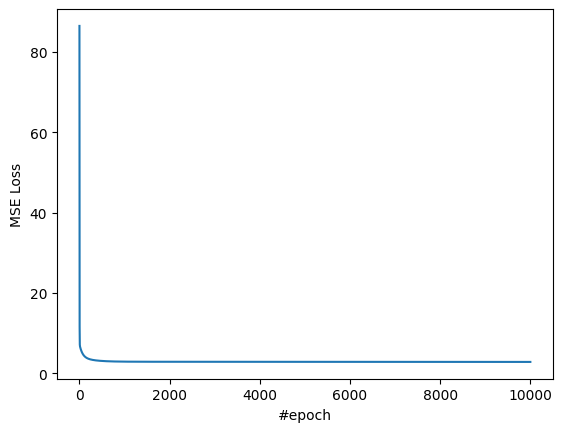

In [21]:
visualize_mse_linear_regression(losses)

In [23]:
print(w1, w2, w3, b)

0.06688781694172043 0.159266373919619 0.028009178263497313 0.06907655199400516


Q11: d) w1 = 0.0786 , w2 = 0.009 , w3 = 3.387e -06

## Batch Linear Regression (MAE Loss)

In [24]:
def compute_loss_mae(y, y_hat):
    return np.abs(y_hat - y)

def compute_gradient_wi_mae(xi, y, y_hat):
    return xi * np.sign(y_hat - y)

def compute_gradient_b_mae(y, y_hat):
    return np.sign(y_hat - y)

In [25]:
def implement_linear_regression_nsamples_mae(X_data , y_data , epoch_max=50 , lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mae(y, y_hat)
                        
            loss_total += loss 
            
            dl_dw1 = compute_gradient_wi_mae(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi_mae(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi_mae(x3, y, y_hat)
            dl_db = compute_gradient_b_mae(y, y_hat)
            
            dw1_total += dl_dw1
            dw2_total += dl_dw2 
            dw3_total += dl_dw3 
            db_total += dl_db
        
        w1 = update_parameters(w1, dw1_total, lr, N)
        w2 = update_parameters(w2, dw2_total, lr, N)
        w3 = update_parameters(w3, dw3_total, lr, N) 
        b = update_parameters(b, db_total, lr, N)
        
        losses.append(loss_total / N)
        
    return (w1, w2, w3, b, losses)

In [26]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X_data, y_data, epoch_max=10000, lr=1e-5)

In [27]:
def visualize_mae_linear_regression(losses):
    plt.plot(losses)
    plt.xlabel("#epoch")
    plt.ylabel("MAE Loss")
    plt.show()

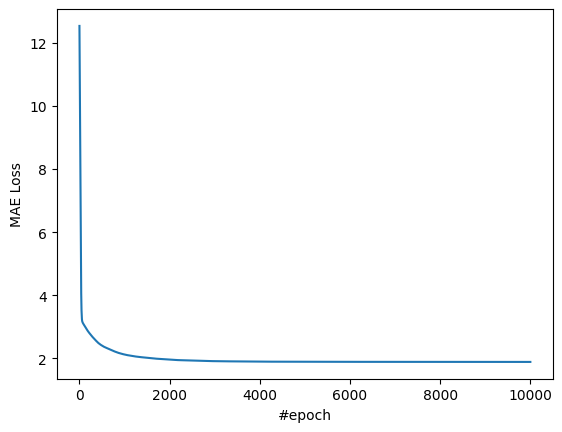

In [28]:
visualize_mae_linear_regression(losses)

In [30]:
print(w1, w2, w3, b)

0.06487487908250957 0.17159839705178181 0.027479689152175368 0.025339899999997553
